# `41-Linear Regression Ecommerce`

# 1. Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [6]:
ec = pd.read_csv("Ecommerce Customers")

In [8]:
ec.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
ec.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [12]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
ec.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
ec.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# 3. Explore Data Insights

In [19]:
sns.set_palette("Set1", 8, .75)
sns.set_style("darkgrid")

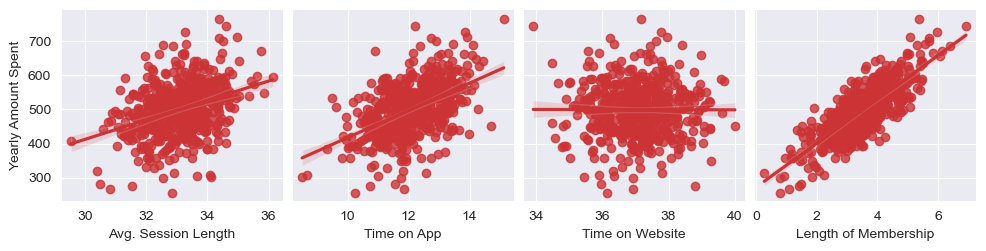

In [21]:
sns.pairplot(ec, x_vars=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', kind='reg')
plt.show()

# 4. Training and Testing Data

In [24]:
ec.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
X = ec.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1)
y = ec['Yearly Amount Spent']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training Model

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y Prediction')

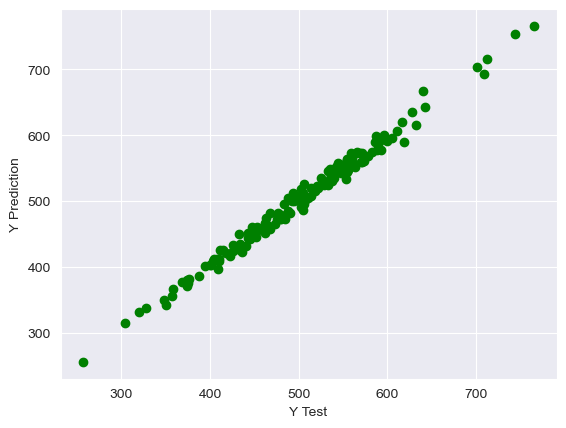

In [39]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Y Test")
plt.ylabel("Y Prediction")

# 5. Evaluating Model

In [42]:
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  -1047.932782250239
Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


In [44]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  7.228148653430841
MSE:  79.81305165097457
RMSE:  8.93381506697864


In [46]:
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

R2 Score:  0.9890046246741234


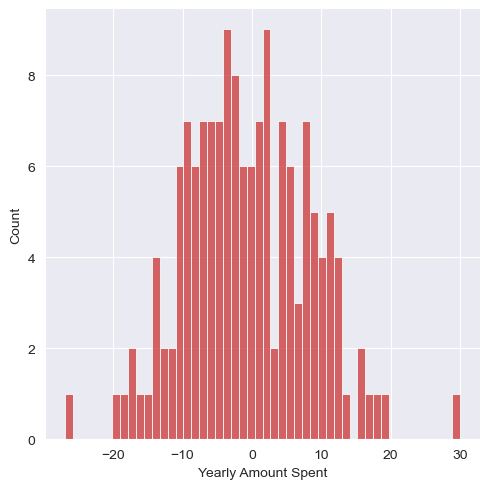

In [48]:
sns.displot(y_test-y_pred, bins=50)

In [49]:
coef_ec = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_ec

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


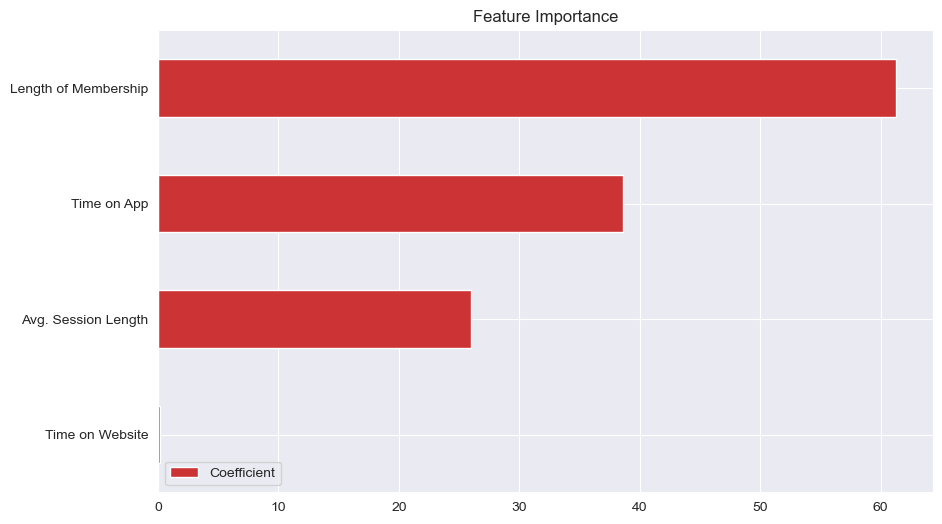

In [52]:
coef_ec.sort_values(by='Coefficient').plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.show()

# 6. Predict New Data

In [55]:
new_customer = pd.DataFrame({
    'Avg. Session Length': [33.053194],
    'Time on App': [12.052488],
    'Time on Website': [37.060445],
    'Length of Membership': [3.533462]
})

predicted_amount = model.predict(new_customer)
print("Predicted Yearly Amount Spent: ", predicted_amount[0])

Predicted Yearly Amount Spent:  499.5317098214821
